In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We load the data and it is immedeatly clear that the columns boat and body contain a lot of NaN values.

In [147]:
#read data into a dataframe
df = pd.read_excel('titanic3.xls')
print(df['boat'].isnull().sum())
print(df['body'].isnull().sum())
df.columns

823
1188


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

We change the column sex to red hot encoding. The age gets rounded down, this seems the most logical to me, and None values are kept. The columns boat and body are dropped because these have a lot of NaN values thus making them insignificant.

In [148]:
df['sex'] = df['sex'].apply(lambda x: 0 if str(x) == 'male' else 1 if str(x) == 'female' else x)
# df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])
df['age'] = df['age'].apply(lambda x: None if pd.isna(x) else int(x))
df.drop(columns=['boat', 'body'], inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.0,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.0,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",0,27.0,0,0,2670,7.2250,NaN,C,NaN


We see a positive correlation between sex and survival.

<Axes: >

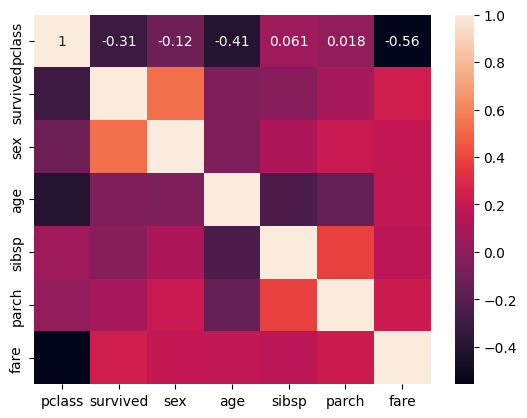

In [149]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

We see that there are no more significant correlations other than sex.

In [150]:
corr['survived'].sort_values(ascending=False)

survived    1.000000
sex         0.528693
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055193
pclass     -0.312469
Name: survived, dtype: float64

<Axes: xlabel='survived', ylabel='age'>

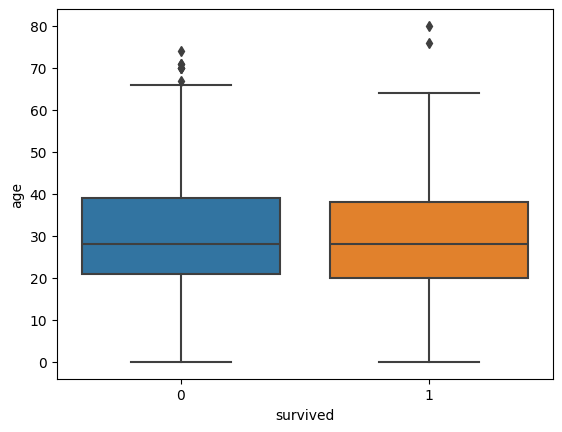

In [151]:
sns.boxplot(data=df, x='survived', y='age')

We can see that more females survived than males.

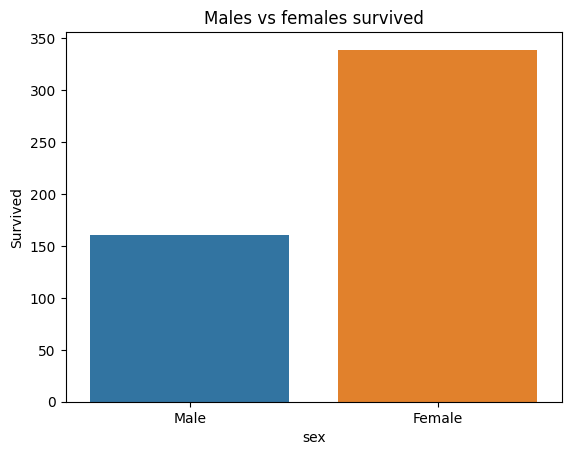

In [152]:
survived_data = df[df['survived'] == 1]

# Create a countplot
sns.countplot(data=survived_data, x='sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survived')
plt.title('Males vs females survived')
plt.show()

Maybe if we make age categories?

In [153]:
def age_cat(age):
    if age < 18:
        return 'Child'
    elif 18 < age < 65:
        return 'Adult'
    elif age > 65:
        return 'Elder'
    else:
        return None
    
df['age category'] = df['age'].apply(lambda x: age_cat(x))

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,age category
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,S,"St Louis, MO",Adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",1,2.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.0,1,0,2665,14.4542,NaN,C,NaN,Child
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,None
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.0,0,0,2656,7.2250,NaN,C,NaN,Adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0,0,0,2670,7.2250,NaN,C,NaN,Adult


Now if we make a plot which distinguishes the agegroups and survivded.

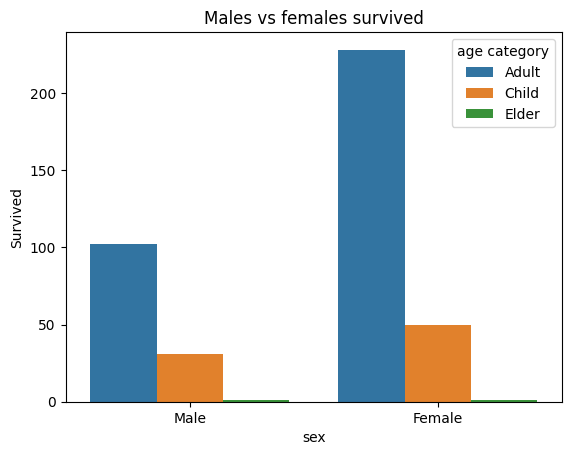

In [154]:
survived_data = df[df['survived'] == 1]

sns.countplot(data=survived_data, x='sex', hue='age category')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survived')
plt.title('Males vs females survived')
plt.show()

Survived per social class

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


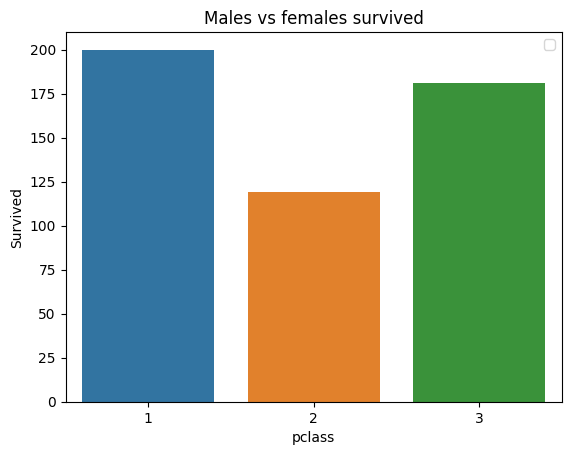

In [155]:

sns.countplot(data=survived_data, x='pclass')
# plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survived')
plt.title('Males vs females survived')
plt.legend()
plt.show()

Now we will take a look at the percentages of people who survived per age catagory compared to how many percent of each age category was on the ship.

First lets look at the adults.

In [156]:
female_adults = df[(df['age category'] == 'Adult') & (df['sex'] == 1)]
female_adults_survived = survived_data[(survived_data['age category'] == 'Adult') & (survived_data['sex'] == 1)]
percentage_female_adults_survived = female_adults_survived['sex'].count() / female_adults['sex'].count()

male_adults = df[(df['age category'] == 'Adult') & (df['sex'] == 0)]
male_adults_survived = survived_data[(survived_data['age category'] == 'Adult') & (survived_data['sex'] == 0)]
percentage_male_adults_survived = male_adults_survived['sex'].count() / male_adults['sex'].count()


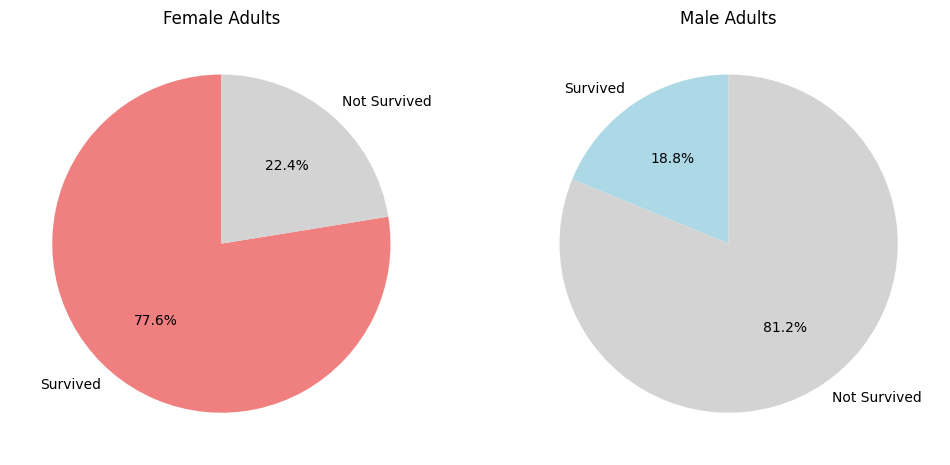

In [157]:
# Define data
labels = ['Survived', 'Not Survived']
colors_female = ['lightcoral', 'lightgray']
colors_male = ['lightblue', 'lightgray']

# Calculate percentages
percentage_female_adults_survived = female_adults_survived['sex'].count() / female_adults['sex'].count()
percentage_female_adults_not_survived = 1 - percentage_female_adults_survived

percentage_male_adults_survived = male_adults_survived['sex'].count() / male_adults['sex'].count()
percentage_male_adults_not_survived = 1 - percentage_male_adults_survived

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Female Adults
ax1.pie([percentage_female_adults_survived, percentage_female_adults_not_survived], labels=labels, colors=colors_female,
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Female Adults')

# Male Adults
ax2.pie([percentage_male_adults_survived, percentage_male_adults_not_survived], labels=labels, colors=colors_male,
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Male Adults')

plt.show()

Now we will look at the children.

In [158]:
female_children = df[(df['age category'] == 'Child') & (df['sex'] == 1)]
female_children_survived = survived_data[(survived_data['age category'] == 'Child') & (survived_data['sex'] == 1)]
percentage_female_children_survived = female_children_survived['sex'].count() / female_children['sex'].count()

male_children = df[(df['age category'] == 'Child') & (df['sex'] == 0)]
male_children_survived = survived_data[(survived_data['age category'] == 'Child') & (survived_data['sex'] == 0)]
percentage_male_children_survived = male_children_survived['sex'].count() / male_children['sex'].count()
percentage_male_children_survived

0.3780487804878049

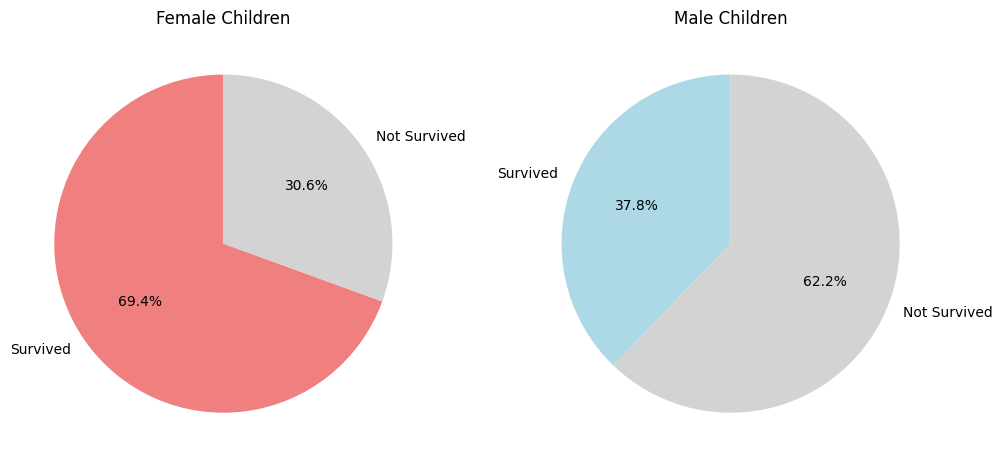

In [159]:
# Define data
labels = ['Survived', 'Not Survived']
colors_female = ['lightcoral', 'lightgray']
colors_male = ['lightblue', 'lightgray']

# Calculate percentages
percentage_female_children_survived = female_children_survived['sex'].count() / female_children['sex'].count()
percentage_female_children_not_survived = 1 - percentage_female_children_survived

percentage_male_children_survived = male_children_survived['sex'].count() / male_children['sex'].count()
percentage_male_children_not_survived = 1 - percentage_male_children_survived

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Female Adults
ax1.pie([percentage_female_children_survived, percentage_female_children_not_survived], labels=labels, colors=colors_female,
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Female Children')

# Male Adults
ax2.pie([percentage_male_children_survived, percentage_male_children_not_survived], labels=labels, colors=colors_male,
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Male Children')

plt.show()

Now the eldrly people.

In [160]:
female_elders = df[(df['age category'] == 'Elder') & (df['sex'] == 1)]
female_elders_survived = survived_data[(survived_data['age category'] == 'Elder') & (survived_data['sex'] == 1)]
percentage_female_elders_survived = female_elders_survived['sex'].count() / female_elders['sex'].count()

male_elders = df[(df['age category'] == 'Elder') & (df['sex'] == 0)]
male_elders_survived = survived_data[(survived_data['age category'] == 'Elder') & (survived_data['sex'] == 0)]
percentage_male_elders_survived = male_elders_survived['sex'].count() / male_elders['sex'].count()

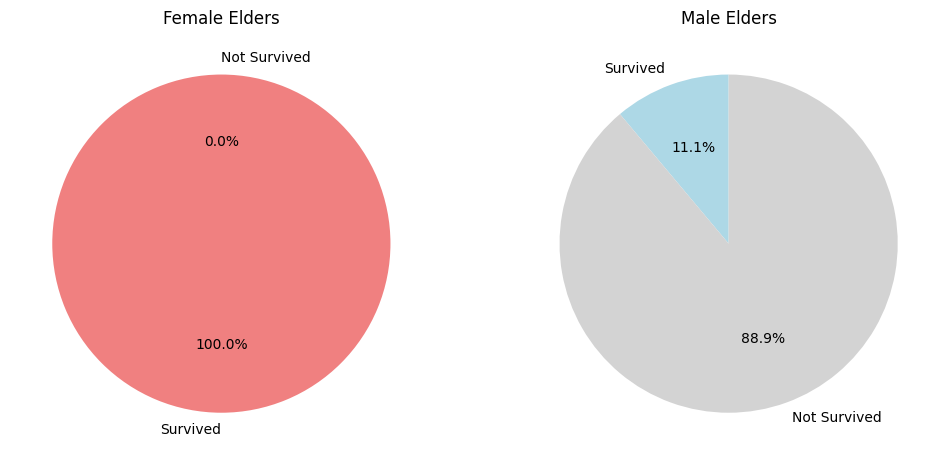

In [161]:
# Define data
labels = ['Survived', 'Not Survived']
colors_female = ['lightcoral', 'lightgray']
colors_male = ['lightblue', 'lightgray']

# Calculate percentages
percentage_female_elders_survived = female_elders_survived['sex'].count() / female_elders['sex'].count()
percentage_female_elders_not_survived = 1 - percentage_female_elders_survived

percentage_male_elders_survived = male_elders_survived['sex'].count() / male_elders['sex'].count()
percentage_male_elders_not_survived = 1 - percentage_male_elders_survived

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Female Adults
ax1.pie([percentage_female_elders_survived, percentage_female_elders_not_survived], labels=labels, colors=colors_female,
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Female Elders')

# Male Adults
ax2.pie([percentage_male_elders_survived, percentage_male_elders_not_survived], labels=labels, colors=colors_male,
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Male Elders')

plt.show()

We can see that the statement 'Women and children first', really applied at this event in time.

In [162]:
from sklearn.ensemble import RandomForestClassifier
# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=['age category'])

# Merge the one-hot encoded columns back into the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'age category' column if needed
df = df.drop(columns=['age category'])
df = df.rename(columns={
    'age category_Adult': 'adult',
    'age category_Child': 'child',
    'age category_Elder': 'elder'
})
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,sibsp,parch,ticket,fare,cabin,embarked,home.dest,adult,child,elder
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,...,0,0,24160,211.3375,B5,S,"St Louis, MO",1,0,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.0,1,2,113781,151.5500,C22 C26,...,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",0,1,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0,1,2,113781,151.5500,C22 C26,...,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",0,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0,1,2,113781,151.5500,C22 C26,...,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0,1,2,113781,151.5500,C22 C26,...,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.0,1,0,2665,14.4542,NaN,...,1,0,2665,14.4542,NaN,C,NaN,0,1,0
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,...,1,0,2665,14.4542,NaN,C,NaN,0,0,0
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.0,0,0,2656,7.2250,NaN,...,0,0,2656,7.2250,NaN,C,NaN,1,0,0
1307,3,0,"Zakarian, Mr. Ortin",0,27.0,0,0,2670,7.2250,NaN,...,0,0,2670,7.2250,NaN,C,NaN,1,0,0


In [174]:
# Features
X = df[['adult', 'child', 'elder', 'age']].fillna(df['age'].mean())
# Target variable (create and populate with real data)
y = df['survived']

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X, y)


RandomForestClassifier(random_state=42)